In [ ]:
! pip install numpy
! pip install matplotlib
! pip install pandas
! pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
class Neuron:

  def __init__(self):
    self._reset()

  def _reset(self):
    self._denderits = []
    self._summitionValue = 0

  def _addDenderit(self,value,weight):
    self._denderits.append({
        value:value,
        weight:weight
    })
    self._summitionValue += value*weight
    
  def makeNoise(self,data,learnedWights,activitionFunction):
    self._reset()
    for value,wight in zip(data,learnedWights):
      self._addDenderit(float(value),wight)

    return activitionFunction(self._summitionValue);
     
def fileIntoArray(address):
  with open(address) as f:
    lines = f.readlines()
  data = [line.split() for line in lines]
  return data

def HEBBlearning(data):

  initialWights = np.zeros(len(data[0])-1);
  for record in data:
    y = float(record.pop(-1))
    cnt = 0
    for x,wight in zip(record,initialWights):
      initialWights[cnt] = float(x) * y + wight
      cnt += 1

  return initialWights

def arrayToDataFrame(data,index):
  df = pd.DataFrame(data,index)
  display(df)
  return df

def separateInputFormTarget(data):
   sources = []
   target = []
   for record in data:
     sources += [record[:len(record)-1]]
     target.append(record[len(record)-1])

   return sources,target

def findFailureRate(yTargetVector,yHatVector):
   failureCount = 0 
   for yTarget,yHat in zip(yTargetVector,yHatVector):
      tempYTarget = lambda y: False if y=='-1' else True
      if(yHat != tempYTarget(yTarget)):
        failureCount +=1
   return ((failureCount/len(yHatVector))*100)

def showDecisionBoundary(inputsMatrix, targetVector , newWightsVector):
  tempInputsMatrix = []
  for record in inputsMatrix:
    tempInputsMatrix += [list(map(float, record))]
  
  for record,target in zip(tempInputsMatrix ,targetVector):
     if target == '1':
       plt.plot(*zip(*[record]), marker='o', color='b', ls='')
     else:
        plt.plot(*zip(*[record]), marker='o', color='r', ls='')
    
  m = -1*newWightsVector[0]/newWightsVector[1]
  b = -1*newWightsVector[2]/newWightsVector[1]
  X = np.linspace(-1,1)
  Y = m*X+b
  plt.plot(X,Y) 
  plt.axis()
  plt.show()

  
def addBiase(mtx):
  for row in mtx:
    tmp = row[-1]
    row[-1] = 1
    row.append(tmp)
  return mtx

def getData():
  learndata = fileIntoArray("./coordinators/1.txt")
  learndata += fileIntoArray("./coordinators/2.txt")
  learndata += fileIntoArray("./coordinators/3.txt")
  learndata += fileIntoArray("./coordinators/4.txt")
  learndata += fileIntoArray("./coordinators/5.txt")

  inputdata = fileIntoArray("./coordinators/2.txt")
  return learndata,inputdata

[ 11.8 -15.1   2. ]


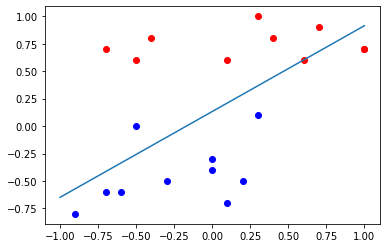

,yHat,y
"['0', '-0.3']",True,1
"['0.3', '0.1']",True,1
"['0.7', '0.9']",False,-1
"['0.2', '-0.5']",True,1
"['1', '0.7']",True,-1
"['-0.7', '-0.6']",True,1
"['-0.4', '0.8']",False,-1
"['-0', '-0.4']",True,1
"['-0.7', '0.7']",False,-1
"['-0.5', '0.6']",False,-1


Failure rate 15.0


In [ ]:
learndata,inputdata = getData()
learndata = addBiase(learndata);

wights = HEBBlearning(learndata)
print(wights);
sources,target = separateInputFormTarget(inputdata);


showDecisionBoundary(sources, target , wights)


neuron = Neuron()

yHat = []
for row in sources:
  isFeasible = neuron.makeNoise(row,wights,lambda x: x>0)
  yHat.append(isFeasible)

index = [
    str(x) for x in sources
]
df = arrayToDataFrame({
    "yHat":yHat,
    "y":target
},index)

FR = findFailureRate(target,yHat)
print("Failure rate",FR)

### shuffle inputs

In [ ]:
learndata,inputdata = getData()
learndata = addBiase(learndata);

shuffledLearnData = np.array(learndata) 
np.random.shuffle(shuffledLearnData)

wights = HEBBlearning(shuffledLearnData.tolist())
print(wights)

sources,target = separateInputFormTarget(inputdata);
neuron = Neuron()


yHat = []
for row in sources:
  isFeasible = neuron.makeNoise(row,wights,lambda x: x>0)
  yHat.append(isFeasible)

index = [
    str(x) for x in sources
]
df = arrayToDataFrame({
    "yHat":yHat,
    "y":target
},index)

FR = findFailureRate(target,yHat)
print("Failure rate",FR)

[ 11.8 -15.1   2. ]


,yHat,y
"['0', '-0.3']",True,1
"['0.3', '0.1']",True,1
"['0.7', '0.9']",False,-1
"['0.2', '-0.5']",True,1
"['1', '0.7']",True,-1
"['-0.7', '-0.6']",True,1
"['-0.4', '0.8']",False,-1
"['-0', '-0.4']",True,1
"['-0.7', '0.7']",False,-1
"['-0.5', '0.6']",False,-1


Failure rate 15.0
